# The peaks over threshold method

This notebook continues with the dataset of the notebook about the `Dataset` object.
There are two main approaches in extreme value theory: the peaks over threshold approach and the block maxima approach.
In this notebook, the peaks over threshold approach will be illustrated.

In the notebook about the `Dataset` object, it was determined that the value 15 was a good guess for the threshold for our dataset.
First, generate the same dataset as in the notebook about the `Dataset` object.

In [1]:
from evt.dataset import Dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pareto, norm

N_DATAPOINTS = 100000  # number of datapoints in the example set
NORMAL_STD = 5  # standard deviation of the normal distribution
PARETO_SHAPE = 2.5  # shape parameter of the Pareto distribution
EXAMPLE_NAME = 'Values'  # for nicer plots
EXAMPLE_INDEX_NAME = 'Index'

np.random.seed(0)  # enforce deterministic behaviour

series = pd.Series(
    norm.rvs(scale=NORMAL_STD, size=N_DATAPOINTS) + pareto.rvs(PARETO_SHAPE, size=N_DATAPOINTS),
    name=EXAMPLE_NAME
)
series.index.name = EXAMPLE_INDEX_NAME

dataset = Dataset(series)

Let's start by determining the peaks over threshold.

In [2]:
from evt.methods.peaks_over_threshold import PeaksOverThreshold

THRESHOLD = 15

peaks_over_threshold = PeaksOverThreshold(dataset, THRESHOLD)

The peaks are stored in the `.series_tail` attribute.

In [3]:
peaks_over_threshold.series_tail

Index
100      16.397033
289      16.271281
1054     17.031374
1114     15.316064
2060     15.697772
           ...    
99506    24.501844
99653    17.925805
99766    18.039467
99960    15.559750
99977    17.572891
Name: Values, Length: 582, dtype: float64

To graphically show the peaks over threshold, we can plot the peaks.
The original dataset is shown for comparison.

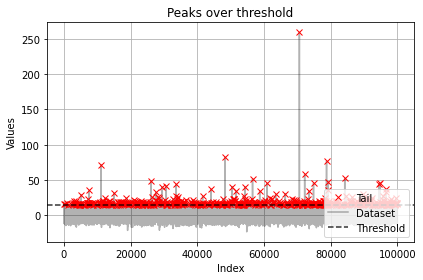

In [4]:
fig, ax = plt.subplots()

peaks_over_threshold.plot_tail(ax)

fig.tight_layout()
plt.show()

A natural next question is whether the tail is fatter or lighter than an exponential.
The exponential distribution is a benchmark for tail behaviour.

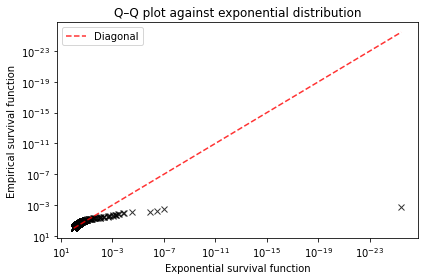

In [5]:
fig, ax = plt.subplots()

peaks_over_threshold.plot_qq_exponential(ax)

fig.tight_layout()
plt.show()

The quantiles of the empirical survival function are not described well by an exponential.
High quantiles seem to lie under the diagonal.
This is a signal of a sub-exponential distribution.

Next, let's make a Zipf plot: a log-log diagram of the survival function against the values.

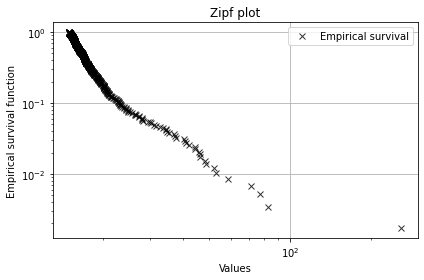

In [6]:
fig, ax = plt.subplots()

peaks_over_threshold.plot_zipf(ax)

fig.tight_layout()
plt.show()

Power laws will show as straight lines in the Zipf plot.

In following notebooks, the tail index in the peaks over threshold method will be estimated.
For example, using the Hill estimator, the moment estimator and maximum likelihood.